# Examples with a chain and a Y-shape

In [1]:
import numpy as np
from corsort import *

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


We study configurations of the following form: a chain of $a$ elements, and a Y-shape with $b$ elements on the "trunk" and $c$ and $d$ elements (respectively) on the "branches". For example:

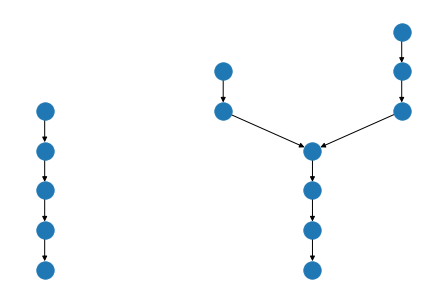

In [2]:
ChainAndY(a=5, b=4, c=2, d=3).draw()

## A simple example

The purpose of this example is to illustrate $\Delta$, $\rho$, the average height and the Kemeny order.

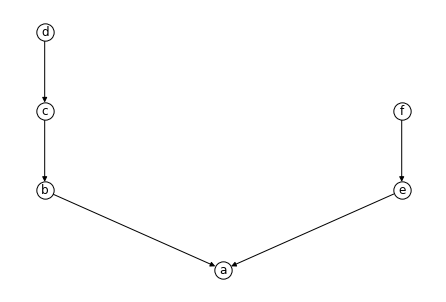

In [3]:
poset = ChainAndY(0, 1, 3, 2)
poset.draw(with_labels=True, alpha_labels=True)

In [4]:
poset.delta

array([-5, -1,  1,  3,  0,  2])

In [5]:
poset.rho

array([Fraction(1, 7), Fraction(2, 5), Fraction(3, 5), Fraction(4, 5),
       Fraction(1, 2), Fraction(3, 4)], dtype=object)

In [6]:
poset.average_height

array([Fraction(1, 1), Fraction(5, 2), Fraction(4, 1), Fraction(11, 2),
       Fraction(3, 1), Fraction(5, 1)], dtype=object)

In [7]:
print_order(poset.order_delta)

(abecfd)


In [8]:
print_order(poset.order_rho)

(abecfd)


In [9]:
print_order(poset.order_average_height)

(abecfd)


In [10]:
print_order(poset.order_kemeny)

(abecfd)


## Looking for a more complex example

We are now looking for an example where the estimators $\Delta$, $\rho$, the average height and the Kemeny order all yield distinct orderings.

In [11]:
def is_good_example(a, b, c, d):
    poset = ChainAndY(a, b, c, d)
    n_nodes = poset.n_nodes
    rho = poset.rho
    if len(set(rho)) < n_nodes:  # Tie in rho
        return False
    delta = poset.delta
    if len(set(delta)) < n_nodes:  # Tie in delta
        return False
    order_rho = poset.order_rho
    order_delta = poset.order_delta
    if np.array_equal(order_rho, order_delta):  # rho and delta agree
        return False
    normalized_height = poset.average_normalized_height
    if len(set(normalized_height)) < n_nodes:  # Tie in p
        return False
    order_average_height = poset.order_average_height
    if np.array_equal(order_average_height, order_rho):  # p and rho agree
        return False
    if np.array_equal(order_average_height, order_delta):  # p and delta agree
        return False
    order_kemeny = poset.order_kemeny
    if np.array_equal(order_kemeny, order_rho):  # kemeny and rho agree
        return False
    if np.array_equal(order_kemeny, order_delta):  # kemeny and delta agree
        return False
    if np.array_equal(order_kemeny, order_average_height):  # kemeny and p agree
        return False
    return True

In [12]:
def find_minimal_example():
    n_nodes = 0
    results = []
    found = False
    while not found:
        n_nodes += 1
        print(f"Testing {n_nodes=}...")
        for a in range(n_nodes + 1):
            for b in range(n_nodes - a + 1):
                remains = n_nodes - a - b
                for c in range(remains // 2 + 1):
                    d = n_nodes - a - b - c
                    # print(f"Testing {a=}, {b=}, {c=}, {d=}...")
                    if is_good_example(a, b, c, d):
                        results.append((a, b, c, d))
                        found = True
    return results

In [13]:
results = find_minimal_example()

Testing n_nodes=1...
Testing n_nodes=2...
Testing n_nodes=3...
Testing n_nodes=4...
Testing n_nodes=5...
Testing n_nodes=6...
Testing n_nodes=7...
Testing n_nodes=8...
Testing n_nodes=9...
Testing n_nodes=10...
Testing n_nodes=11...
Testing n_nodes=12...
Testing n_nodes=13...
Testing n_nodes=14...
Testing n_nodes=15...


In [14]:
results

[(3, 7, 2, 3)]

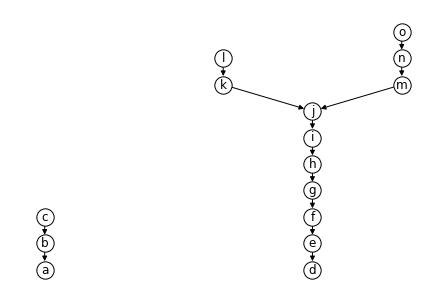

In [15]:
poset = ChainAndY(*results[0])
poset.draw(with_labels=True, alpha_labels=True)

In [16]:
for criterion in ['delta', 'rho', 'average_height', 'kemeny']:
    print(criterion)
    order = getattr(poset, f'order_{criterion}')
    print_order(order)
    print(poset.kemeny_score(order))
    print()

delta
(defghaibjcmknlo)
10.03076923076923

rho
(defaghibjmcknlo)
8.914285714285715

average_height
(defaghibjmkcnlo)
8.661978021978022

kemeny
(deafghibjmknclo)
8.61054945054945



In [17]:
poset.delta

array([ -2,   0,   2, -11,  -9,  -7,  -5,  -3,  -1,   1,   6,   8,   5,
         7,   9])

In [18]:
poset.rho

array([Fraction(1, 4), Fraction(1, 2), Fraction(3, 4), Fraction(1, 13),
       Fraction(2, 13), Fraction(3, 13), Fraction(4, 13), Fraction(5, 13),
       Fraction(6, 13), Fraction(7, 13), Fraction(4, 5), Fraction(9, 10),
       Fraction(8, 11), Fraction(9, 11), Fraction(10, 11)], dtype=object)

In [19]:
poset.average_normalized_height

array([Fraction(1, 4), Fraction(1, 2), Fraction(3, 4), Fraction(1, 13),
       Fraction(2, 13), Fraction(3, 13), Fraction(4, 13), Fraction(5, 13),
       Fraction(6, 13), Fraction(7, 13), Fraction(9, 13),
       Fraction(11, 13), Fraction(17, 26), Fraction(10, 13),
       Fraction(23, 26)], dtype=object)